# Welcome to Jupyter Notebook Tutorial by AIMLC, IITD
--- prepared by [Nirjhar Das](https://www.linkedin.com/in/nirjhar-das-874596195).

In this notebook, we will get familiar with the Jupyter environment and also
explore the powerful __Python__ libraries:
1. __Pandas__
2. __NumPy__
3. __Matplotlib__

## Package installation and import

If you have installed ___Anaconda___ then these packages are already installed, so you can proceed to the next block of codes.

Otherwise, if you have only __Python 3.x__ installed in your computer, then you
have to install these packages separately.
At your _terminal/cmd_ run the following commands
```terminal
pip install numpy pandas matplotlib
```
\[ __Note__: You need internet connectivity to download and install these packages using the __pip__ command \]

Once the packages are installed, proceed to the next block of codes given below.

In [1]:
#import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading with Pandas

__Pandas__ is the perfect package for handling tabular data. It has awesome methods to manipulate and perform calculations on the data. The data is read as an object called _DATAFRAME_ in Pandas. The dataframe holds the whole table of data and supports functions to work in data.

Find out more in the [official documentation](https://pandas.pydata.org/docs/).

Let's take a look into some examples.

In [2]:
#Now that the packages are installed, we can load the data into the program
df = pd.read_csv('StudentsPerformance.csv')
print('Number of entries = ', len(df))
df.head(10)

Number of entries =  1000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


You can see that there are 1000 rows in table. Each row correspond to an ___observation___ (student) and the columns are the ___features___ pertaining to the observations. Typical Machine Learning requires you to extract features from a raw data file (say, some website, or some software). In this case, the data has already been collected and stored in a .csv file.

Once the data is collected, the pipeline involves __Exploratory Data Analysis (EDA)__, where the engineer looks into the data and tries to figure out statistics and correlations. Let's do some basic EDA now.

In [3]:
#Let's get an idea of the different types of data values present in each column (except the last three)
col_dict = {}
for col in df.columns[:-3]:
    col_dict[col] = list(df[col].unique())
print(col_dict)

{'gender': ['female', 'male'], 'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group E'], 'parental level of education': ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'], 'lunch': ['standard', 'free/reduced'], 'test preparation course': ['none', 'completed']}


In [4]:
for key in col_dict:
    print('Distribution of values for', key)
    print(df[key].value_counts(), end='\n\n')

Distribution of values for gender
female    518
male      482
Name: gender, dtype: int64

Distribution of values for race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Distribution of values for parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Distribution of values for lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64

Distribution of values for test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64



Now that we have an idea of the __categorical__ data values, let us look at some statistics related to the __numerical__ data values.

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Digression
Here, I would like to point out that in most cases, numerical data is __standardized__ before further processing. This is because most of Machine Learning algortihms give better result with Standard data. This step is particularly important when data values belong to different scales (for e.g. height vs. weight which have different units). Also, in Neural Networks, things (I mean, parameter values) may explode if data is not _normalized/standardized_.

___How to standardize data?___<br>
A normal distribution is one in which __mean ($\mu$) = 0.0__ and __standard deviation ($\sigma$) = 1.0__<br>
So, for a set of observations of random variable _x_ do<br>
$$x^\prime = \frac{x - \mu}{\sigma}$$

#### Python Code for standardization
```python
s, sq_s, n = 0.0, 0.0, 0.0
for x in observed_dataset:
    s = s + x
    sq_s = sq_s + (x*x)
    n = n + 1.0

mean = s/n
sq_mean = sq_s/n
std = math.sqrt(sq_mean - (mean*mean))

new_dataset = []
for x in observed_dataset:
    x_new = (x - mean)/std
    new_dataset.append(x_new)
```

___How to normalize data?___<br>
A normalized data is such that $x \in [0, 1]$<br>
So for a set of observations of $x$ do:<br>
$$x^\prime = \frac{x - x_{min}}{x_{max} - x_{min}}$$

#### Python code for normalization
```python
min_x = min(observed_dataset)
max_x = max(observed_dataset)
new_dataset = [(x - min_x)/(max_x - min_x) for x in observed_dataset]
```

## But!
![We don't do that here](https://i.imgflip.com/2bqill.jpg "Meme1")

Let's unlock the power of __NumPy__.

In [6]:
#Let's take an example
math_score = np.array(df['math score'])
std_math_score = (math_score - np.mean(math_score))/np.std(math_score) #That's it! It's standardized!

#Create a column in dataframe and add the standardized scores
df['standardized math score'] = std_math_score
#To cross-check:
df['standardized math score'].describe()

count    1.000000e+03
mean     8.704149e-17
std      1.000500e+00
min     -4.360728e+00
25%     -5.997164e-01
50%     -5.872457e-03
75%      7.199368e-01
max      2.237538e+00
Name: standardized math score, dtype: float64

__Note__: _mean_ $\sim 10^{-17}$ which is very close to $0.0$. Similarly, _std_ $\approx 1.0$. The error remains due to some internal computation.

In [7]:
#Normalizing data
norm_math_score = (math_score - np.min(math_score))/(np.max(math_score) - np.min(math_score))
df['normalized math score'] = norm_math_score
df['normalized math score'].describe()

count    1000.000000
mean        0.660890
std         0.151631
min         0.000000
25%         0.570000
50%         0.660000
75%         0.770000
max         1.000000
Name: normalized math score, dtype: float64

__Note__: _min_ $= 0.0$, _max_ $= 1.0$. Thus, every value $\in [0, 1]$

## Power of NumPy
__NumPy__ is the Linear Algebra library of Python. It lets you manipulate matrices and perform wide range of matrix operations. Find out more about this amazing library from the [official documentation](https://numpy.org/doc/stable/).

In [8]:
#Let's look at a few examples
A = np.random.rand(5, 5) #Define a matrix of size 5x5 filled with random values
B = np.random.normal(0.0, 1.0, size=(5, 3)) #Define a matrix of size 5x3 filled with random values from a Normal Distribution
C = np.zeros((3, 2)) #A matrix filled with zeros
I = np.eye(5) #An identity matrix of order 5
v = np.random.rand(5) #A vector of size 5x1
u = np.random.uniform(low=-1.0, high=1.0, size=5) #A vector of size 5x1 with uniform sampling between low and high

print('A =')
print(A, end='\n\n')
print('B =')
print(B, end='\n\n')
print('C =')
print(C, end='\n\n')
print('I =')
print(I, end='\n\n')
print('v =')
print(v, end='\n\n')
print('u =')
print(u, end='\n\n')

A =
[[0.93332435 0.20735817 0.05303171 0.68391967 0.83502065]
 [0.10895158 0.99527198 0.92882919 0.46145559 0.74911084]
 [0.70639988 0.22345965 0.38785954 0.29415968 0.61790354]
 [0.19625242 0.57499556 0.91101731 0.88614217 0.60173533]
 [0.31313551 0.00167818 0.04331418 0.28822055 0.6376449 ]]

B =
[[-1.56514871  0.10604266 -0.66464789]
 [ 0.75119322 -0.94055065 -0.82375871]
 [ 1.05449204 -0.23966716 -0.67346716]
 [ 1.23693188  1.02651514 -0.08527441]
 [ 0.73307603  0.04828995  1.26091245]]

C =
[[0. 0.]
 [0. 0.]
 [0. 0.]]

I =
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

v =
[0.65270969 0.75497102 0.25543954 0.23137629 0.65860055]

u =
[ 0.49833328  0.91703895 -0.37795252  0.98517254  0.34938271]



In [9]:
#Element-wise squaring a matrix
print('A**2 =\n', A**2, end='\n\n')

#Matrix squaring
print('A^2 =\n', np.matmul(A, A), end='\n\n')

#Matrix multiplication
print('A x B =\n', A@B)
print('Shape =', (A@B).shape, end='\n\n') #Note: Shape should be (5, 3)

#Matrix-vector multiplication
print('I.v =\n', np.dot(I, v), end='\n\n')

#Transpose
print('C\' =\n', C.T)
print(C.T.shape, end='\n\n')

#Dot product
print('u\'.v =\n', np.dot(u, v))

#Addition/Substraction is just simple +/- but size should match

A**2 =
 [[8.71094345e-01 4.29974107e-02 2.81236203e-03 4.67746115e-01
  6.97259479e-01]
 [1.18704478e-02 9.90566305e-01 8.62723659e-01 2.12941264e-01
  5.61167048e-01]
 [4.99000792e-01 4.99342171e-02 1.50435022e-01 8.65299179e-02
  3.81804791e-01]
 [3.85150134e-02 3.30619890e-01 8.29952546e-01 7.85247948e-01
  3.62085412e-01]
 [9.80538497e-02 2.81629872e-06 1.87611794e-03 8.30710841e-02
  4.06591018e-01]]

A^2 =
 [[1.32684345 0.80641274 0.92189585 1.59632543 1.91143312]
 [1.19138344 1.48730622 1.74331196 1.43183645 2.16581353]
 [1.20884752 0.62572934 0.69020101 1.13908992 1.56792363]
 [1.25168861 1.32708475 1.73118154 1.6262208  2.07444758]
 [0.57927021 0.24307605 0.32515765 0.66686197 0.86951925]]

A x B =
 [[ 0.20899182  0.63360837  0.16770681]
 [ 2.67650344 -0.63729436 -0.61260153]
 [ 0.28806108  0.1035741  -0.16075671]
 [ 2.62264429  0.20035387 -0.53446628]
 [ 0.38078282  0.34790091  0.5407586 ]]
Shape = (5, 3)

I.v =
 [0.65270969 0.75497102 0.25543954 0.23137629 0.65860055]

C' =


## Finally, let's discuss about Matplotlib

__Matplotlib__ is the Python library for plotting graphs and figures. Here we will look at a few examples.

Find out more about this library from the [official documentation](https://matplotlib.org/3.3.3/contents.html).

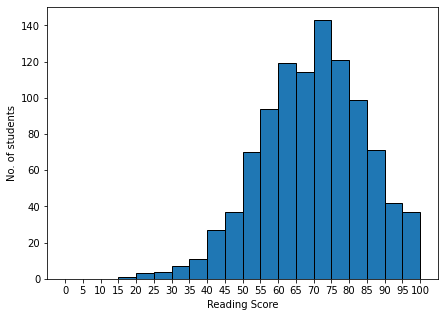

In [10]:
#Plotting a histogram
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(0.0, 105.0, 5.0))
plt.xlabel('Reading Score')
plt.ylabel('No. of students')
_, _, _ = plt.hist(x=df['reading score'], bins=20, range=(0.0, 100.0), edgecolor='black')
plt.show()

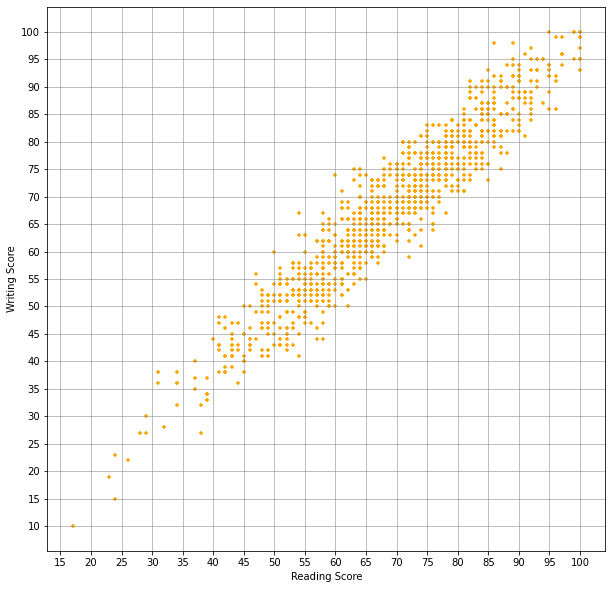

In [11]:
#Scatter Plot to observe the correlation
plt.figure(figsize=(10, 10))
plt.grid(True, linewidth=0.5, color='gray', linestyle='-')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.xticks(np.arange(0.0, 105.0, 5.0))
plt.yticks(np.arange(0.0, 105.0, 5.0))
plt.scatter(x=df['reading score'], y=df['writing score'], s=10.0, color='orange', marker='+')
plt.show()

# Conclusion

In this tutorial, we learnt the basics of __Pandas__, __NumPy__ and __Matplotlib__. There are many more awesome things you can do with these packages. As you set out to explore the world of _Data Science_ and _Machine Learning_, you will get to know more about these libraries and several others. There are plenty of resources available in the Internet as well as there are good books on the topic. Moreover, since you are a part of __AIMLC__, we will make sure that you have the right resources and learning environment.